# Jesus or Russell? A Deep Learning Solution

* A widespread issue in the 21st century is the confusion between [Jesus Christ](https://en.wikipedia.org/wiki/Jesus), a prominent religious figure, and [Russell Brand](https://en.wikipedia.org/wiki/Russell_Brand), a British comedian and actor.
* We train a resnet34 CNN model on 286 images of Jesus Christ and Russell Brand scraped from Google Images, and achieve an accuracy of 96.5%.
* This model is **state-of-the-art** among image classifiers that distinguish Jesus Christ from Russell Brand.

### Import libraries and download images of Jesus Christ and Russell Brand.
This image classifier uses the fast.ai library. 

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 64

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
classes = ['russell_brand', 'jesus_christ']
for c in classes:
    path = Path('images')/c
    path.mkdir(parents=True, exist_ok=True)
    filename = str('urls_'+c+'.csv')
    filepath = Path('images')/filename
    download_images(filepath, path, max_pics=150)
    print(c)
    verify_images(path, delete=True, max_size=500)

Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/r9mkavbyz5nrrobfyb2r HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/r9mkavbyz5nrrobfyb2r (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/rf/image_908w/2010-2019/Wires/Images/2014-03-09/Reuters/2014-03-09T213403Z_01_OCH102_RTRIDSP_3_BRITAIN.jpg&w=1484 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
russell_brand


cannot identify image file <_io.BufferedReader name='images/russell_brand/00000052.jpg'>
cannot identify image file <_io.BufferedReader name='images/russell_brand/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='images/russell_brand/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='images/russell_brand/00000069.jpg'>


Error https://www.washingtonpost.com/resizer/lVdkvCAt75zGxtas_pCvJ3MJhqI=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/57ZKMSFBCQZKLG7N75ZIG2YKXE.JPG HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
jesus_christ


cannot identify image file <_io.BufferedReader name='images/jesus_christ/00000011.png'>
cannot identify image file <_io.BufferedReader name='images/jesus_christ/00000019.jpg'>
cannot identify image file <_io.BufferedReader name='images/jesus_christ/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='images/jesus_christ/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='images/jesus_christ/00000121.jpg'>


### Create an ImageDataBunch object

* Filepaths are used to determine whether an image should be labeled 'russell_brand' or 'jesus_christ'. 
* 80% of our 286 images are used for training, while the remaining 20% is used for validation.

In [5]:
np.random.seed(25)
data = ImageDataBunch.from_folder(Path('images'), train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

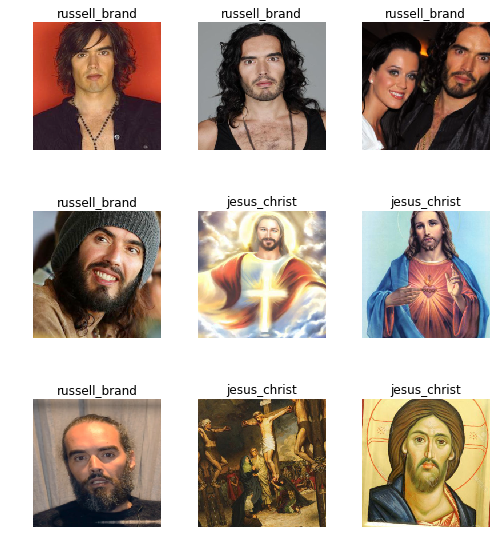

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
len(data.train_ds), len(data.valid_ds)

(229, 57)

### Training and Results

A resnet34 model pre-trained on Imagenet data is trained on our dataset for four epochs.

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.915063,0.351464,0.140351,00:04
1,0.604606,0.162748,0.035088,00:02
2,0.453606,0.134423,0.035088,00:02
3,0.380613,0.121313,0.035088,00:02


At four epochs, the error rate is minimized at **3.5%**. The weights are saved in 'Images/Models/model-1.pth'.

In [11]:
learn.save('model-1')

From the validation set of 57 photos, only two photos (i.e. 3.5%) are misclassified by the model. These are the first couple of images below:

* The first image is an image of Jesus Christ where His face has been partially cropped. If I squint my eyes I can see why the model classified this image as Russell Brand.
* The second image is a forensic-anthropologic reconstruction of "what Christ might have actually looked like" (an interesting read!). Nevertheless, this depiction of Jesus is very different from the mainstream one. I do not think He looks like Russell Brand in this photo at all. 

The other seven displayed below are examples of images *correctly* classified by the model. Validation results are summarized in the confusion matrix below. 

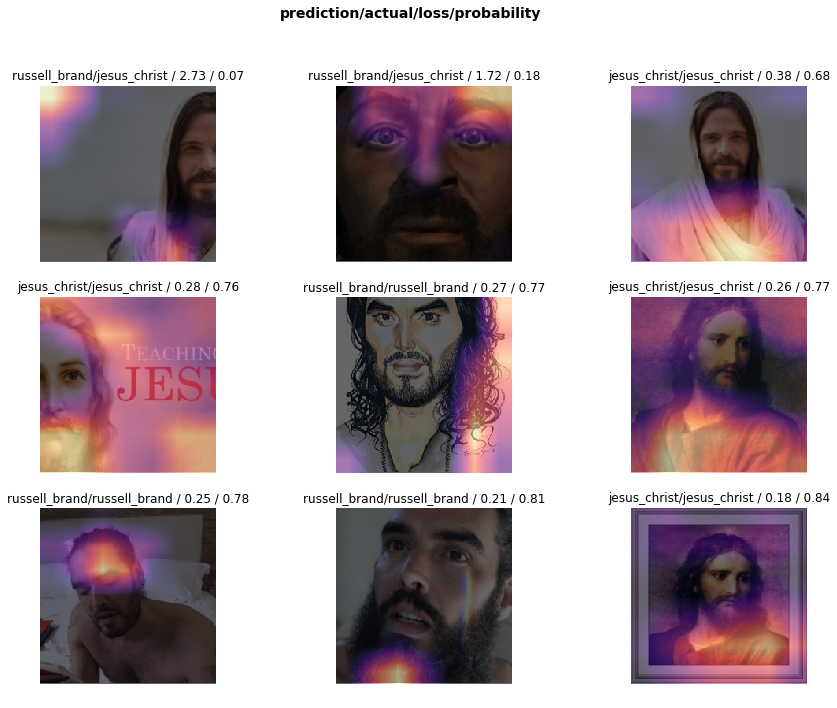

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(15,11))

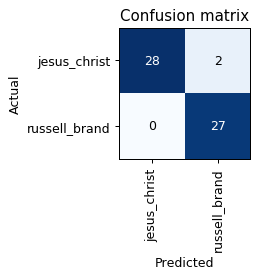

In [14]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=90)